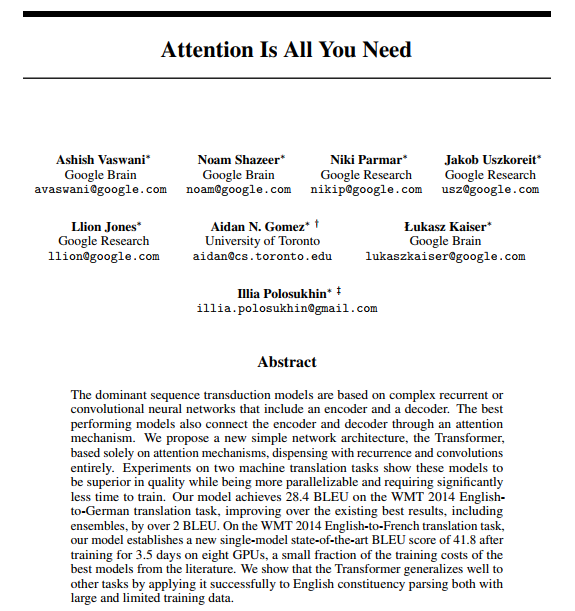

In [2]:
from IPython.display import Image
Image(filename='pictures/transformer.png')

本文翻译自哈佛NLP[The Annotated Transformer](https://nlp.seas.harvard.edu/2018/04/03/attention.html)
本文主要由Harvard NLP的学者在2018年初撰写，以逐行实现的形式呈现了论文的“注释”版本,对原始论文进行了重排，并在整个过程中添加了评论和注释。本文的note book可以在[篇章2](https://github.com/datawhalechina/learn-nlp-with-transformers/tree/main/docs/%E7%AF%87%E7%AB%A02-Transformer%E7%9B%B8%E5%85%B3%E5%8E%9F%E7%90%86)下载。

内容组织：
- Pytorch编写完整的Transformer
  - 背景
  - 模型架构
  - Encoder部分和Decoder部分
    - Encoder
    - Decoder
    - Attention
    - 模型中Attention的应用
    - 基于位置的前馈网络
  - Embeddings和softmax
  - 位置编码
  - 完整模型
- 训练
  - 批处理和mask
  - Traning Loop
  - 训练数据和批处理
  - 硬件和训练时间
  - 优化器
  - 正则化
    - 标签平滑
- 实例
  - 合成数据
  - 损失函数计算
  - 贪婪解码
- 真实场景例
- 结语
- 致谢


# 预备工作

In [3]:
# !pip install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl numpy matplotlib spacy torchtext seaborn 

In [4]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import math, copy, time
from torch.autograd import Variable
import matplotlib.pyplot as plt
import seaborn
seaborn.set_context(context="talk")
%matplotlib inline